# Data Exploration

In [123]:
import numpy as np
import pandas as pd

In [124]:
df = pd.read_excel('eski_veriV2.xls', 
                 parse_dates={'dt' : ['Tarih', 'Saat']}, 
                  index_col='dt')

In [125]:
df.head()

,GIP USD,PTF (USD/MWh),GOP Islem Hacmi (USD),Toplam Uretim (MWh),Yenilenebilir Uretim,Doğal Gaz,Barajlı,Linyit,Akarsu,İthal Kömür,...,GIP (h-72),Demand (h-168),PTF (h-168),GIP (h-168),HOUR,MONTH,YEAR,DAY,WEEKDAY,Sistem Yönü (h-1)
dt,,,,,,,,,,,,,,,,,,,,,
2016-01-05 00:00:00,9.259619,48.19,517628.066000,26261.65,10484.86,5703.53,4636.68,3686.37,3329.43,5475.19,...,58.898889,26471.26,45.93,39.265926,0,5,2016,1,7,1
2016-01-05 01:00:00,17.872493,35.72,373599.053071,25144.45,9996.44,5262.77,4229.74,3649.37,3388.04,5331.30,...,48.861090,25005.52,45.96,39.265926,1,5,2016,1,7,1
2016-01-05 02:00:00,7.347060,24.99,264766.836600,24052.60,9304.58,5171.30,3555.62,3550.88,3448.53,5123.93,...,44.620370,23983.51,43.82,37.481111,2,5,2016,1,7,1
2016-01-05 03:00:00,4.800000,0.12,18187.134857,23507.84,8988.91,5173.42,3259.57,3526.00,3423.78,4999.26,...,24.987407,23194.25,9.29,32.440794,3,5,2016,1,7,1
2016-01-05 04:00:00,4.289878,0.29,20371.792683,23179.01,9155.65,5252.19,3287.25,3402.97,3433.64,4639.93,...,24.987407,23155.13,1.78,2.655804,4,5,2016,1,7,1


In [126]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
# retrieve the array
data = df.values

In [127]:
# split into input and output elements
X, y = data[:, 1:], data[:, 0]

In [128]:
def split_train_test(df,n):
   
    return df[:n].copy(), df[n:].copy()

In [129]:
n_test = int(len(data) * 0.3)
n_train = len(data)-n_test
X_train, X_test = split_train_test(X, n_train)
y_train, y_test = split_train_test(y , n_train)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30677, 58), (30677,), (13147, 58), (13147,))

# Baseline Model Performance (Linear Regression)

In [130]:
df.isna().sum()

GIP USD                     0
PTF (USD/MWh)               0
GOP Islem Hacmi (USD)       0
Toplam Uretim (MWh)         0
Yenilenebilir Uretim        0
Doğal Gaz                   0
Barajlı                     0
Linyit                      0
Akarsu                      0
İthal Kömür                 0
Rüzgar                      0
Güneş                       0
Fuel Oil                    0
Jeotermal                   0
Asfaltit Kömür              0
Taş Kömür                   0
Biyokütle                   0
Nafta                       0
LNG                         0
Uluslararası                0
Demand                      0
Demand (h-1)                0
PTF (h-1)                   0
GIP (h-1)                   0
Pozitif dengesizlik(h-1)    0
Negatif dengesizlik(h-1)    0
Demand (h-2)                0
PTF (h-2)                   0
GIP (h-2)                   0
Pozitif dengesizlik(h-2)    0
Negatif dengesizlik(h-2)    0
Demand (h-3)                0
PTF (h-3)                   0
GIP (h-3) 

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 1.009


In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_train)
# evaluate predictions
mae = mean_absolute_error(y_train, yhat)
print('MAE: %.3f' % mae)

MAE: 1.241


# Beyca Ders

In [187]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [188]:
df.head()

,GIP USD,PTF (USD/MWh)
dt,,
2016-01-05 00:00:00,9.259619,48.19
2016-01-05 01:00:00,17.872493,35.72
2016-01-05 02:00:00,7.347060,24.99
2016-01-05 03:00:00,4.800000,0.12
2016-01-05 04:00:00,4.289878,0.29


In [189]:
df = df[["PTF (USD/MWh)","GIP USD"]]

In [190]:
df.head()

,PTF (USD/MWh),GIP USD
dt,,
2016-01-05 00:00:00,48.19,9.259619
2016-01-05 01:00:00,35.72,17.872493
2016-01-05 02:00:00,24.99,7.347060
2016-01-05 03:00:00,0.12,4.800000
2016-01-05 04:00:00,0.29,4.289878


In [191]:
#datayi hazirlamadan once bir train ve test diye ayiralim.
n = len(df)
train_df = df[:int(0.8*n)]
test_df = df[int(0.8*n):]
print(train_df.shape)
print(test_df.shape)

#simdi datayi normalize etmemiz lazim (butun deep learning modelleri icin bunu unutmamaliyiz)
#train datasi uzerinden normalize edecegiz.
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

(35059, 2)
(8765, 2)


In [192]:
#offset kac adim sonrasini tahmin etmek istedigimizle alakalidir.
#period kac tane datayi tahmin edecegimizle alakalidir.
#period offsetten buyuk olamaz.
#target_col = 1 yani 1.sutunu tahmin ediyoruz 0'i degil.
def make_data(data,lag = 72, offset = 2, period = 1, target_col = 1):
    X = []
    y = []
    for i in range(len(data) - lag - offset):
        X.append(data[i:i+lag,:])
        y.append(data[i+lag + offset - 1,target_col])

    return np.array(X), np.array(y)

In [193]:
lag = 72 #3 saat oncesine bakip sicakligi tahmin ediyor
offset = 1 #1 saat sonrasini tahmin ediyor.
period = 1
target_col = 1
n_features = train_df.shape[1]
#train_df.values dersek sade bir numpy arrayi olarak alir.
X_train, y_train = make_data(train_df.values, lag = lag, offset = offset, period = period,target_col = target_col)
X_test, y_test = make_data(test_df.values, lag = lag, offset = offset, period = period,target_col = target_col)
print(X_train.shape) #56k sample var her bir satirda 3 adim geriye bakmisim, 2 tane de featureimiz var.
print(X_train[:2])
print(y_train[:2])

(34986, 72, 2)
[[[ 0.13301204 -2.60189507]
  [-0.72738909 -1.98835366]
  [-1.46773425 -2.73813697]
  [-3.18370669 -2.91957777]
  [-3.17197708 -2.95591651]
  [-3.1712871  -3.08978844]
  [-3.17956683 -3.23636573]
  [-3.17197708 -3.25815066]
  [-3.17059713 -3.25893984]
  [-1.09859664 -3.26150763]
  [ 0.1461216   0.05312937]
  [ 1.20523607  1.24043654]
  [ 1.04378149  1.08239204]
  [ 1.11829899  1.16415514]
  [-0.08985048 -0.08775104]
  [-0.48313728 -0.47040026]
  [-0.60526319 -0.5593603 ]
  [-0.72876904 -0.71586173]
  [-0.72738909 -0.73020323]
  [ 1.04378149  1.09154449]
  [ 1.30390276  1.45189429]
  [ 1.11829899  1.2361192 ]
  [ 1.04792135  1.17515391]
  [-0.08985048 -0.07758038]
  [-0.72738909 -0.71697962]
  [-1.46773425 -1.49023618]
  [-1.71474597 -1.73584945]
  [-3.06779058 -3.08341916]
  [-3.06779058 -3.08377181]
  [-1.46842423 -1.48153911]
  [-1.46842423 -1.52425232]
  [ 1.11829899  1.31672912]
  [-0.72876904 -0.72069289]
  [ 1.48743661  1.72554554]
  [ 1.85519427  1.93715449]
  [ 2

In [194]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(64,input_shape = (lag, n_features)))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(period)) #activation linear olsun

In [195]:
model.compile(optimizer = 'adam',loss = 'mse', metrics = ['mape'])
model.fit(X_train,y_train, epochs = 15)

Epoch 1/15
1094/1094 [==============================] - 34s 31ms/step - loss: 0.3223 - mape: 281.9865
Epoch 2/15
1094/1094 [==============================] - 34s 31ms/step - loss: 0.2650 - mape: 271.8098
Epoch 3/15
1094/1094 [==============================] - 33s 30ms/step - loss: 0.2561 - mape: 280.3240
Epoch 4/15
1094/1094 [==============================] - 33s 30ms/step - loss: 0.2589 - mape: 244.2489
Epoch 5/15
1094/1094 [==============================] - 34s 31ms/step - loss: 0.2447 - mape: 260.9510
Epoch 6/15
1094/1094 [==============================] - 34s 31ms/step - loss: 0.2528 - mape: 286.4273
Epoch 7/15
1094/1094 [==============================] - 34s 31ms/step - loss: 0.2531 - mape: 264.5842
Epoch 8/15
1094/1094 [==============================] - 33s 30ms/step - loss: 0.2526 - mape: 257.6574
Epoch 9/15
1094/1094 [==============================] - 34s 31ms/step - loss: 0.2378 - mape: 234.3220
Epoch 10/15
1094/1094 [==============================] - 33s 31ms/step - loss: 0.2

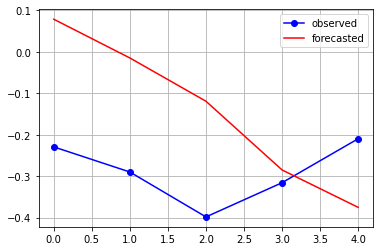

In [202]:
ypred = model.predict(X_test)

plt.plot(y_test[-5:], '-ob', label =  'observed')
plt.plot(ypred[-5:], '-r', label = 'forecasted')
plt.grid()
plt.legend()

In [221]:
ypred_old = (ypred * train_std[1]) + train_mean[1]

In [222]:
y_test_old = (y_test*train_std[1]) + train_mean[1]

In [223]:
ypred_old

array([[39.999226],
       [41.462337],
       [34.43588 ],
       ...,
       [44.108963],
       [41.781982],
       [40.515472]], dtype=float32)

In [224]:
y_test_old

array([45.09107146, 40.47639835, 36.07515139, ..., 40.19173603,
       41.35041244, 42.83946655])

In [227]:
from sklearn.metrics import mean_absolute_error as mae

In [228]:
mae(ypred_old,y_test_old)

2.584171194447044